
# SDR Quick Data Analyzer

This notebook demonstrates common functions used as diagnostics in IQ binary files from radios in the lab.  
There should be another file in the Onboarding Tools section that can be run as a background script for  
more large scale data plotting.

### Modules

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Reading in

Here we read in the binary file and convert the contents to a numpy array. Binary files are normally saved as .byn or .iq

In [9]:
# By default we use some example data
# IMPORTANT: you may have to fix this path depending on where you downloaded the repository
filename = "/Users/lfc/Documents/OnboardingTools/examples/1701233402_CARL_20231129_0450_4463.0_31250.0_--LOOPS_RSPduo--_0.byn"

# Using the np.fromfile() function:
#   It is necessary to define the filename and the type of binary data stored.
#   Optionally you can define offset (Number of bytes to skip at the beginning before reading) or
#   you can define count (Number of items to read. An item is defined by the datatype. -1 reads
#   to the end of the file)

# First method 
data_firstmethod = np.nan_to_num(np.fromfile(filename, dtype="float32",offset=0, count = -1))
data_firstmethod = np.complex64(data_firstmethod[0::2] + 1j*data_firstmethod[1::2])

# Second method 
dtype = np.dtype([('re',np.float32),('im',np.float32)])
data_secondmethod = np.fromfile(filename,dtype=dtype,offset=0,count=-1)
data_secondmethod = data_secondmethod.view(np.complex64)



### Diagnostic Plots

To quickly check the data you collected, think of these two plots as the most powerful tools.  
A spectrogram is a plot of time vs frequency where each time slice of samples is fourier transformed.  
A power spectral density (psd) is a plot of frequency vs power (dB).

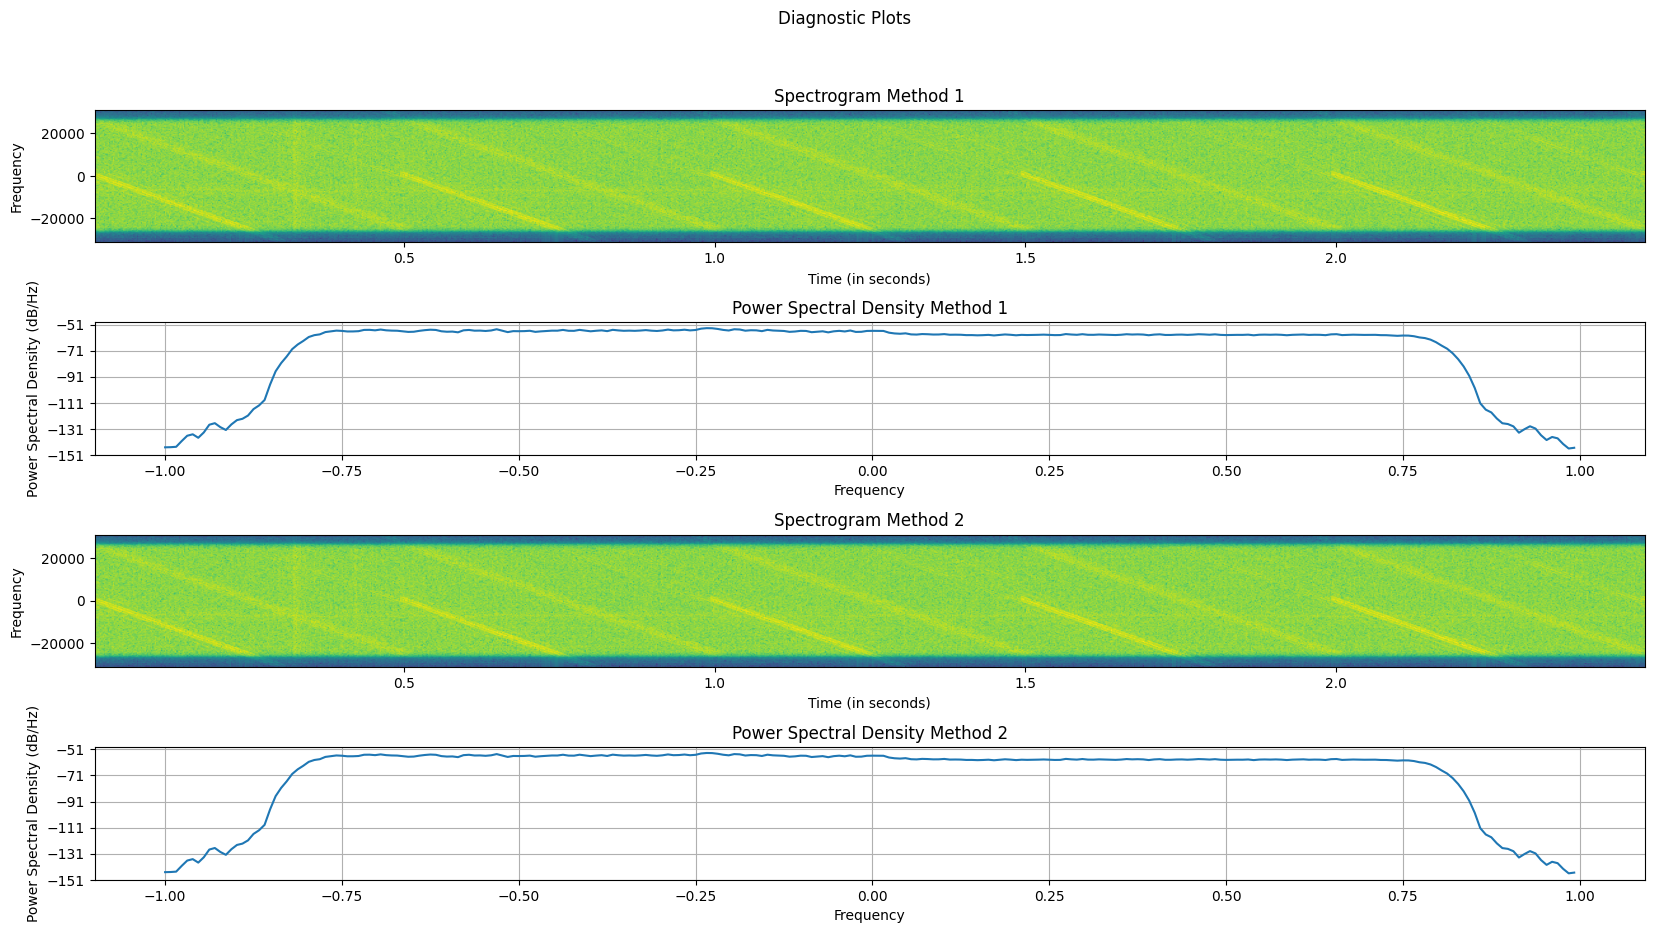

In [ ]:
# Plotting figures to view the data

# The specgram() function needs the FFT bin size (NFFT) to be specified as a power of 2.
# Also, define the sample frequency (Fs) which will produce the width of the plot.
# It can be useful to define center frequency (Fc). Otherwise the center of the y-axis is zero.

fig, (ax0,ax1,ax2,ax3) = plt.subplots(4,1,figsize=[20,10])
fig.subplots_adjust(hspace=0.6)

# First method
ax0.specgram(data_firstmethod,NFFT=256,Fs=62500)
ax0.set_title("Spectrogram Method 1")
ax0.set_xlabel("Time (in seconds)")
ax0.set_ylabel("Frequency")
ax1.set_title("Power Spectral Density Method 1")
ax1.psd(data_firstmethod)

# Second method
ax2.set_title("Spectrogram Method 2")
ax2.specgram(data_secondmethod,NFFT=256,Fs=62500)
ax2.set_xlabel("Time (in seconds)")
ax2.set_ylabel("Frequency")
ax3.set_title("Power Spectral Density Method 2")
ax3.psd(data_secondmethod)
fig.suptitle("Diagnostic Plots")

plt.show()


### Making things easier...

Now that you understand this process, you can use the readiq.py script in this folder. Run the script in the same directory as your analysis notebook and do the following to run the premade functions in the script.

(PS) This is a useful way to reduce the size of your code if you find yourself writing the same lines over and over again.

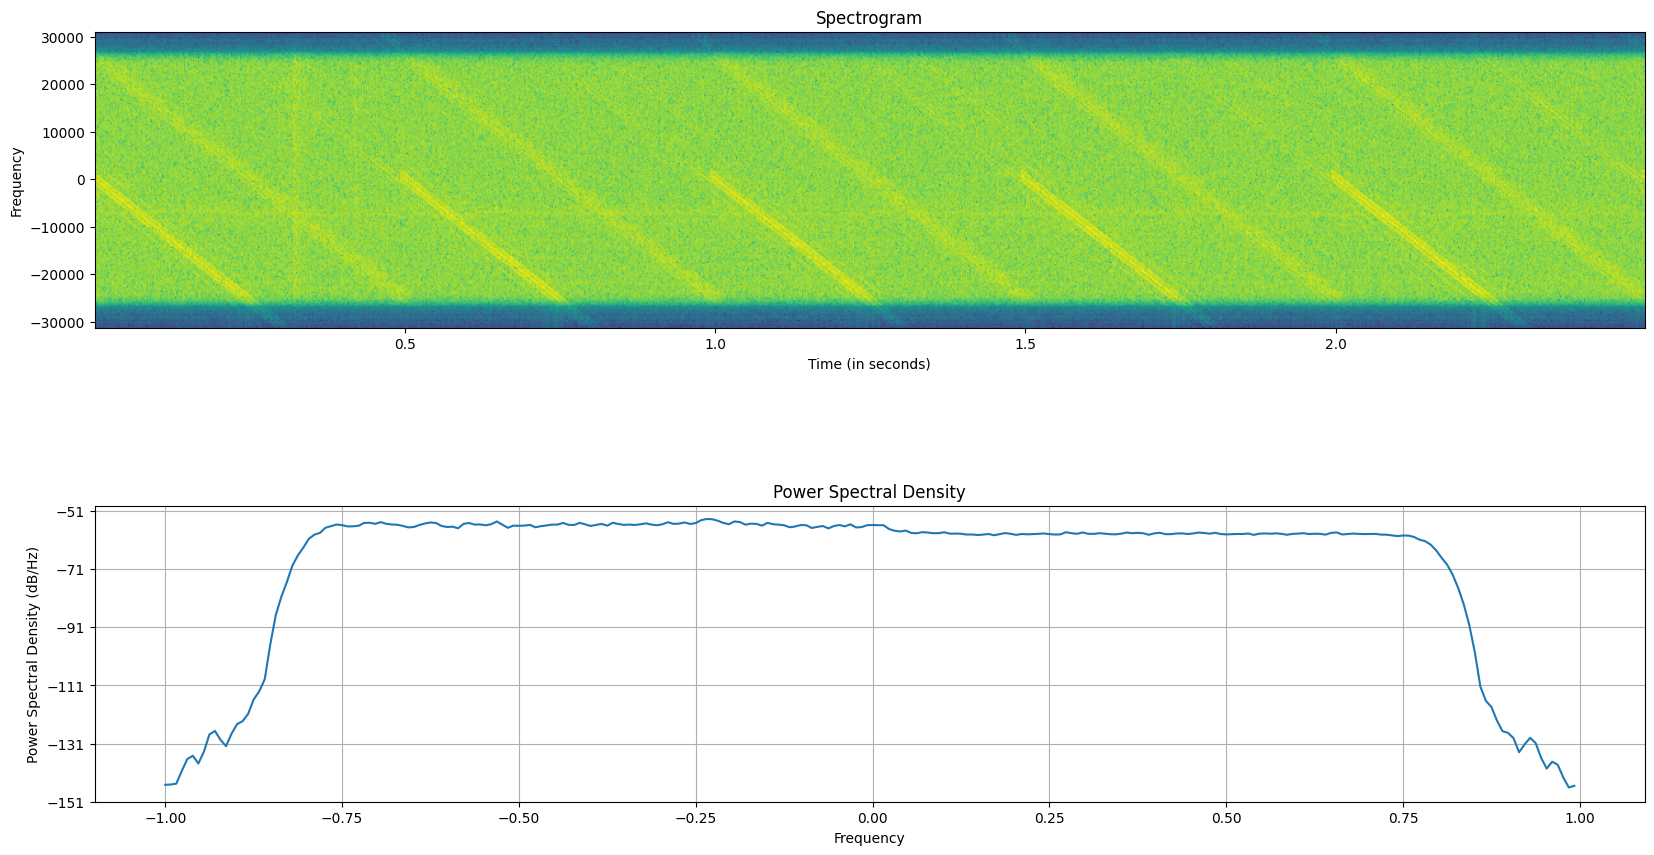

In [ ]:
import readiq as readiq

data_thirdmethod = readiq.convertiq(filename)

plotname = readiq.quickplotfromiq(filename,62500)

